<!-- <div>
    <img src="attachment:image.png" align="right" width="150">
</div> -->

# <font color='#5D6D7E '> <center >Forecasting</center>
    
### Master Degree Program in Data Science and Advanced Analytics    
    
### <font color='#5D6D7E '> Business Cases with Data Science Project: 
> #### Group AA

### <font color='#5D6D7E '> Done by:
> #### - Beatriz Martins Selidónio Gomes, m20210545
> #### - Catarina Inês Lopes Garcez, m20210547    
> #### - Diogo André Domingues Pires, m20201076  
> #### - Rodrigo Faísca Guedes, m20210587 

---

<div>
    
# Table of Content<a class="anchor"><a id='toc'></a>

### <font color='#5D6D7E '>Business Understanding  
- [<font color='#000000'>Introduction </font>](#first-bullet)<br>   
- [<font color='#000000'>Objective of the Project</font>](#second-bullet)<br> 
   
### <font color='#5D6D7E '> Import and Data Integration  
- [<font color='#000000'>Import the needed Libraries</font>](#third-bullet)<br> 
- [<font color='#000000'>Import and Transform the format of Data</font>](#fourth-bullet)<br>
- [<font color='#000000'>CRISP-DM Methodology - Cross Industry Standard Process for Data Mining </font>](#sixth-bullet)<br>

### <font color='#5D6D7E '> Data Exploration and Understanding    
- [<font color='#000000'>Initial Analysis (EDA - Exploratory Data Analysis)</font>](#fifth-bullet)<br> 
- [<font color='#000000'>Variables Distribution</font>](#seventh-bullet)<br>    
    
### <font color='#5D6D7E '> Data Preparation      
- [<font color='#000000'>Data Transformation</font>](#eighth-bullet)<br>
- [<font color='#000000'>Outlier Detection and Treatment</font>](#thirteenth-bullet)<br>  
- [<font color='#000000'>Create new Features</font>](#eighteenth-bullet)<br>   
- [<font color='#000000'>One-Hot Encoding for Non-metric Features</font>](#nineteenth-bullet)<br>  
- [<font color='#000000'>Variables Distribution after the treatments</font>](#twelfth-bullet)<br>   
- [<font color='#000000'>Normalization</font>](#seventeenth-bullet)<br> 
- [<font color='#000000'>Separating Feature and Label variables</font>](#nineteen-bullet)<br>      
- [<font color='#000000'>Random Oversampling of Minority Class</font>](#fourteenth-bullet)<br>  
- [<font color='#000000'>Feature Selection</font>](#sixteenth-bullet)<br> 
- [<font color='#000000'>Final Selected Features</font>](#twentieth-bullet)<br>  
- [<font color='#000000'>TimeSeriesSplit</font>](#fortythird-bullet)<br> 
    
   
    
### <font color='#5D6D7E '> Modelling    
- [<font color='#000000'>Decision Tree</font>](#twentysecond-bullet)<br>   
- [<font color='#000000'>Random Forest</font>](#twentythird-bullet)<br> 
- [<font color='#000000'>Logistic Regression</font>](#twentyfourth-bullet)<br>   
- [<font color='#000000'>Support Vector Classification</font>](#twentysixth-bullet)<br>   
- [<font color='#000000'>Model Selection</font>](#twentyseventh-bullet)<br> 
  

</div>

---

# Import and Data Integration


## <font color='#5D6D7E '>Import the needed Libraries</font> <a class="anchor" id="third-bullet"></a>
  [Back to TOC](#toc)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# # Remember: library imports are ALWAYS at the top of the script, no exceptions!
# import sqlite3
# import os
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set()
# from math import ceil
# import matplotlib.cm as cm
# import joblib
# import random
# from collections import Counter
# import datetime

# from collections import Counter
# from sklearn.preprocessing import StandardScaler

# #  RFE and Models
# # explore the number of selected features for RFE
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline
# from matplotlib import pyplot
# # report which features were selected by RFE
# from sklearn.datasets import make_classification
# from sklearn.feature_selection import RFE
# from sklearn.tree import DecisionTreeClassifier
# import sklearn
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import LabelEncoder
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.linear_model import LassoCV
# from sklearn import preprocessing
# from sklearn.preprocessing import RobustScaler
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import KFold
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score 
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.svm import SVC
# from sklearn import metrics
# from sklearn.model_selection import StratifiedKFold

# Data Exploration and Understanding

## <font color='#5D6D7E'>Initial Analysis (EDA - Exploratory Data Analysis) </font> <a class="anchor" id="fifth-bullet"></a>
  [Back to TOC](#toc)


In [2]:
df = pd.read_csv('../data/data_aux/df_BTC.csv')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


### Data Types

In [3]:
# Get to know the number of instances and Features, the DataTypes and if there are missing values in each Feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1826 non-null   object 
 1   BTC-USD_ADJCLOSE  1826 non-null   float64
 2   BTC-USD_CLOSE     1826 non-null   float64
 3   BTC-USD_HIGH      1826 non-null   float64
 4   BTC-USD_LOW       1826 non-null   float64
 5   BTC-USD_OPEN      1826 non-null   float64
 6   BTC-USD_VOLUME    1826 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.0+ KB


### Missing Values

In [4]:
# Count the number of missing values for each Feature
df.isna().sum().to_frame().rename(columns={0: 'Count Missing Values'})

,Count Missing Values
Date,0
BTC-USD_ADJCLOSE,0
BTC-USD_CLOSE,0
BTC-USD_HIGH,0
BTC-USD_LOW,0
BTC-USD_OPEN,0
BTC-USD_VOLUME,0


### Descriptive Statistics

In [5]:
# Descriptive Statistics Table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BTC-USD_ADJCLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_CLOSE,1826.0,1.804610e+04,1.766363e+04,1.281080e+03,6.496697e+03,9.308620e+03,3.281227e+04,6.756683e+04
BTC-USD_HIGH,1826.0,1.850453e+04,1.812314e+04,1.294830e+03,6.601735e+03,9.460084e+03,3.393167e+04,6.878962e+04
BTC-USD_LOW,1826.0,1.750229e+04,1.713547e+04,1.265930e+03,6.398990e+03,9.144854e+03,3.127879e+04,6.638206e+04
BTC-USD_OPEN,1826.0,1.802713e+04,1.766487e+04,1.265990e+03,6.493085e+03,9.296878e+03,3.278917e+04,6.754973e+04
BTC-USD_VOLUME,1826.0,2.276132e+10,2.063458e+10,3.296310e+08,5.586124e+09,1.904227e+10,3.344625e+10,3.509679e+11


In [6]:
# settings to display all columns
pd.set_option("display.max_columns", None)

# display the dataframe head
df.sample(n=10)

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
103,2017-08-07,3378.939941,3378.939941,3397.679932,3180.889893,3212.780029,1482279936
125,2017-08-29,4579.020020,4579.020020,4625.680176,4352.129883,4389.209961,2486080000
1207,2020-08-15,11865.698242,11865.698242,11963.203125,11768.697266,11768.697266,23354924400
1076,2020-04-06,7271.781250,7271.781250,7271.781250,6782.889648,6788.049805,46896904615
1165,2020-07-04,9132.488281,9132.488281,9183.295898,9053.629883,9084.233398,12290528515
502,2018-09-10,6329.700195,6329.700195,6374.979980,6292.759766,6301.569824,3714100000
631,2019-01-17,3678.563965,3678.563965,3680.135986,3621.960938,3651.871094,5464420383
240,2017-12-22,13831.799805,13831.799805,15943.400391,11833.000000,15898.000000,22197999616
1185,2020-07-24,9536.892578,9536.892578,9623.336914,9481.454102,9585.514648,16552768325
999,2020-01-20,8657.642578,8657.642578,8745.590820,8560.473633,8704.631836,26422375678


In [7]:
#CHECK ROWS THAT HAVE ANY MISSING VALUE IN ONE OF THE COLUMNS
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME


In [8]:
#FILTER OUT ROWS THAT ARE MISSING INFORMATION
df = df[~row_has_NaN]
df.reset_index(inplace=True, drop=True)
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


#### __`Observations`__

- The Dataset presents __25902 duplicated records__ and  __missing values in the features “Children” and “Country”__. That may occur because it is common for hotels not to know this kind of information until the moment of check-in;


- Analyzing the Descriptive Statistics, , we found out  odd values in the variable “ADR” that stands for Average Daily Rate and the minimum value present in the distribution is 0. We noticed that a Coherence Check will be needed in the next phase;


- Looking at min, max, mean and 75% values of some variables like "ADR", "StaysInWeekendNights" and “StaysInWeekNights" we could conclude that an outlier treatment will be needed in the next phase.

# Data Preparation


## <font color='#5D6D7E'>Data Transformation</font> <a class="anchor" id="eighth-bullet"></a>
  [Back to TOC](#toc)

 __`Duplicates`__

In [9]:
# Checking if exist duplicated observations
print(f'\033[1m' + "Number of duplicates: " + '\033[0m', df.duplicated().sum())  

Number of duplicates:  0


 __`Convert Date to correct format`__

In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008
...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167


 __`Get percentual difference between open and close values and low and high values`__

In [11]:
df['pctDiff_CloseOpen'] = abs((df[df.columns[2]]-df[df.columns[5]])/df[df.columns[2]])*100
df['pctDiff_HighLow'] = abs((df[df.columns[3]]-df[df.columns[4]])/df[df.columns[4]])*100
df.head()

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
0,2017-04-26,1281.079956,1281.079956,1294.829956,1265.930054,1265.989990,329631008,1.177910,2.282899
1,2017-04-27,1317.729980,1317.729980,1319.699951,1281.300049,1281.880005,449196992,2.720586,2.996948
2,2017-04-28,1316.479980,1316.479980,1331.280029,1292.369995,1317.739990,527488992,0.095711,3.010750
3,2017-04-29,1321.790039,1321.790039,1327.199951,1315.209961,1317.839966,422705984,0.298843,0.911641
4,2017-04-30,1347.890015,1347.890015,1347.910034,1314.920044,1321.869995,413115008,1.930426,2.508897


In [12]:
def plot_coinValue(df):
    
    #Get coin name
    coin_name = df.columns[2].split('-')[0]
    
    #Get date and coin value
    x = df['Date']
    y = df[df.columns[2]] # ADA-USD_CLOSE
    
    #Get the volume of trades
    v = df[df.columns[-3]]/1e9
    
    #Get percentual diferences
    y2 = df[df.columns[-1]] # pctDiff_HighLow
    y1= df[df.columns[-2]]  # pctDiff_CloseOpen
    
    fig, axs = plt.subplots(3, 1, figsize=(12,14))
    
    axs[0].plot(x, y)
    axs[2].plot(x, v)
    
    # plotting the line 1 points 
    axs[1].plot(x, y1, label = "Close/Open")

    # plotting the line 2 points 
    axs[1].plot(x, y2, label = "High/Low")
    axs[1].legend()
    
    axs[0].title.set_text('Time Evolution of '+ coin_name)
    axs[0].set(xlabel="", ylabel="Close Value in USD$")
    
    axs[2].title.set_text('Volume of trades of '+ coin_name)
    axs[2].set(xlabel="", ylabel="Total number of trades in billions")
    
    
    axs[1].title.set_text('Daily Market percentual differences of '+ coin_name)
    axs[1].set(xlabel="", ylabel="Percentage (%)")
    
    plt.savefig('../analysis/'+coin_name +'_stats'+'.png')
    
    return coin_name

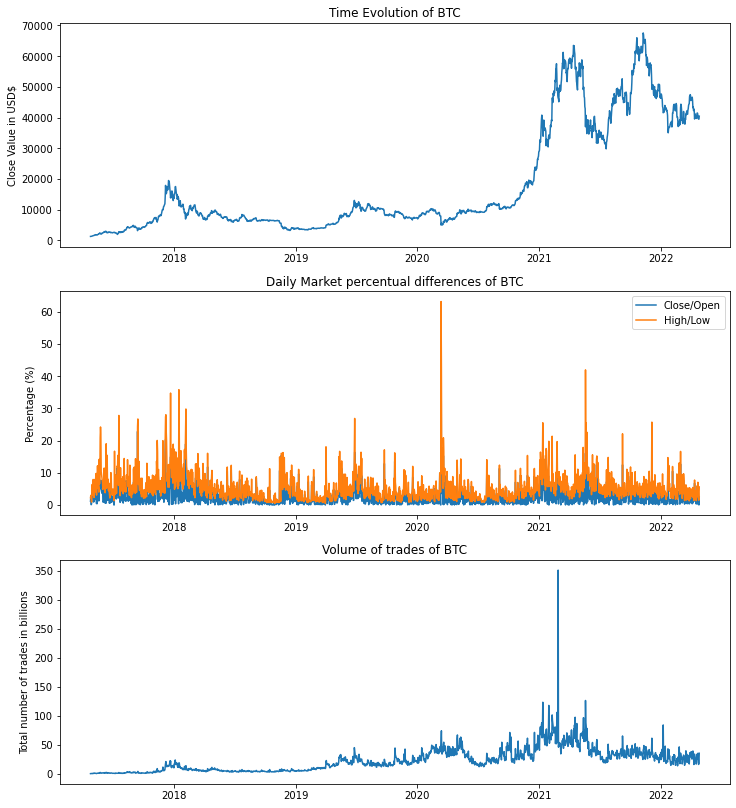

In [13]:
coin_name = plot_coinValue(df)

In [14]:
#FILTER DATASET
df = df.loc[df['Date']>= '2021-11-01']
df

,Date,BTC-USD_ADJCLOSE,BTC-USD_CLOSE,BTC-USD_HIGH,BTC-USD_LOW,BTC-USD_OPEN,BTC-USD_VOLUME,pctDiff_CloseOpen,pctDiff_HighLow
1650,2021-11-01,61004.406250,61004.406250,62419.003906,59695.183594,61320.449219,36150572843,0.518066,4.562881
1651,2021-11-02,63226.402344,63226.402344,64242.792969,60673.054688,60963.253906,37746665647,3.579436,5.883564
1652,2021-11-03,62970.046875,62970.046875,63516.937500,61184.238281,63254.335938,36124731509,0.451467,3.812582
1653,2021-11-04,61452.230469,61452.230469,63123.289062,60799.664062,62941.804688,32615846901,2.423955,3.821773
1654,2021-11-05,61125.675781,61125.675781,62541.468750,60844.609375,61460.078125,30605102446,0.547073,2.788841
...,...,...,...,...,...,...,...,...,...
1821,2022-04-21,40527.363281,40527.363281,42893.582031,40063.828125,41371.515625,35372786395,2.082919,7.063114
1822,2022-04-22,39740.320312,39740.320312,40777.757812,39315.417969,40525.863281,28011716745,1.976690,3.719507
1823,2022-04-23,39486.730469,39486.730469,39935.859375,39352.203125,39738.722656,16138021249,0.638169,1.483160
1824,2022-04-24,39469.292969,39469.292969,39845.925781,39233.539062,39478.375000,17964398167,0.023010,1.560876


# BUILDING LSTM MODEL

## Strategy

Create a DF (windowed_df) where the middle columns will correspond to the close values of X days before the target date and the final column will correspond to the close value of the target date. Use these values for prediction and play with the value of X

In [15]:
def get_windowed_df(X, df):
    start_Date = df['Date'] + pd.Timedelta(days=X)
    
    perm = np.zeros((1,X+1))
    
    #Get labels for DataFrame
    j=1
    labels=[]
    
    while j <= X:
        label = 'closeValue_' + str(j) + 'daysBefore'
        labels.append(label)
        
        j+=1
 
    labels.append('closeValue')
    
    for i in range(X,df.shape[0]):
        temp = np.zeros((1,X+1))
        
        #Date for i-th day
        #temp[0,0] = df.iloc[i]['Date']
        
        #Close values for k days before
        for k in range(X):           
            temp[0,k] = df.iloc[i-k-1,2]
            
        #Close value for i-th date
        temp[0,-1] = df.iloc[i,2]
        

        #Add values to the permanent frame
        perm = np.vstack((perm,temp))
        
        #Get the array in dataframe form
        windowed_df = pd.DataFrame(perm[1:,:], columns = labels)
        
    return windowed_df

In [16]:
#Get the dataframe and append the dates
windowed_df = get_windowed_df(7, df)
windowed_df['Date'] = df.iloc[7:]['Date'].reset_index(drop=True)
windowed_df

,closeValue_1daysBefore,closeValue_2daysBefore,closeValue_3daysBefore,closeValue_4daysBefore,closeValue_5daysBefore,closeValue_6daysBefore,closeValue_7daysBefore,closeValue,Date
0,63326.988281,61527.480469,61125.675781,61452.230469,62970.046875,63226.402344,61004.406250,67566.828125,2021-11-08
1,67566.828125,63326.988281,61527.480469,61125.675781,61452.230469,62970.046875,63226.402344,66971.828125,2021-11-09
2,66971.828125,67566.828125,63326.988281,61527.480469,61125.675781,61452.230469,62970.046875,64995.230469,2021-11-10
3,64995.230469,66971.828125,67566.828125,63326.988281,61527.480469,61125.675781,61452.230469,64949.960938,2021-11-11
4,64949.960938,64995.230469,66971.828125,67566.828125,63326.988281,61527.480469,61125.675781,64155.941406,2021-11-12
...,...,...,...,...,...,...,...,...,...
164,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39935.515625,40527.363281,2022-04-21
165,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,40553.464844,39740.320312,2022-04-22
166,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,40424.484375,39486.730469,2022-04-23
167,39486.730469,39740.320312,40527.363281,41374.378906,41502.750000,40826.214844,39716.953125,39469.292969,2022-04-24


In [17]:
#Get the X,y and dates into a numpy array to apply on a model

def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, -1]

    middle_matrix = df_as_np[:, 0:-2]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

    Y = df_as_np[:, -2]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((169,), (169, 7, 1), (169,))

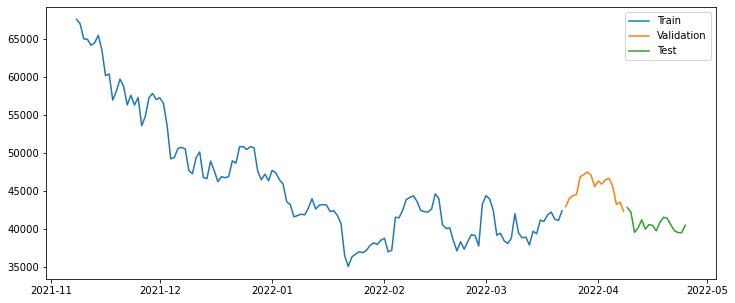

In [18]:
#Partition for train, validation and test

q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

fig,axs = plt.subplots(1, 1, figsize=(12,5))

#Plot the partitions
axs.plot(dates_train, y_train)
axs.plot(dates_val, y_val)
axs.plot(dates_test, y_test)

axs.legend(['Train', 'Validation', 'Test'])

fig.savefig('../analysis/'+coin_name +'_partition'+'.png')

In [19]:
import os
os.environ['PYTHONHASHSEED']= '0'
import numpy as np
np.random.seed(1)
import random as rn
rn.seed(1)
import tensorflow as tf
tf.random.set_seed(1)

from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((7, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.07),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, shuffle=False, batch_size=1200, verbose=2)

Epoch 1/100
1/1 - 2s - loss: 2183502848.0000 - mean_absolute_error: 46062.1211 - val_loss: 2051169536.0000 - val_mean_absolute_error: 45261.4258 - 2s/epoch - 2s/step
Epoch 2/100
1/1 - 0s - loss: 2183162112.0000 - mean_absolute_error: 46058.4219 - val_loss: 2050390912.0000 - val_mean_absolute_error: 45252.8320 - 33ms/epoch - 33ms/step
Epoch 3/100
1/1 - 0s - loss: 2182370048.0000 - mean_absolute_error: 46049.8203 - val_loss: 2048916096.0000 - val_mean_absolute_error: 45236.5312 - 26ms/epoch - 26ms/step
Epoch 4/100
1/1 - 0s - loss: 2180868864.0000 - mean_absolute_error: 46033.5156 - val_loss: 2046452224.0000 - val_mean_absolute_error: 45209.2852 - 24ms/epoch - 24ms/step
Epoch 5/100
1/1 - 0s - loss: 2178362112.0000 - mean_absolute_error: 46006.2812 - val_loss: 2042706560.0000 - val_mean_absolute_error: 45167.8477 - 28ms/epoch - 28ms/step
Epoch 6/100
1/1 - 0s - loss: 2174550272.0000 - mean_absolute_error: 45964.8320 - val_loss: 2037359360.0000 - val_mean_absolute_error: 45108.6133 - 26ms/ep

Epoch 50/100
1/1 - 0s - loss: 66699668.0000 - mean_absolute_error: 6982.3140 - val_loss: 3991249.0000 - val_mean_absolute_error: 1522.9315 - 24ms/epoch - 24ms/step
Epoch 51/100
1/1 - 0s - loss: 61939604.0000 - mean_absolute_error: 6395.5059 - val_loss: 2765808.7500 - val_mean_absolute_error: 1507.1531 - 24ms/epoch - 24ms/step
Epoch 52/100
1/1 - 0s - loss: 63313628.0000 - mean_absolute_error: 6151.5796 - val_loss: 5969860.5000 - val_mean_absolute_error: 2064.0413 - 24ms/epoch - 24ms/step
Epoch 53/100
1/1 - 0s - loss: 68754848.0000 - mean_absolute_error: 6042.6616 - val_loss: 11570618.0000 - val_mean_absolute_error: 2999.6880 - 24ms/epoch - 24ms/step
Epoch 54/100
1/1 - 0s - loss: 76199032.0000 - mean_absolute_error: 6143.3877 - val_loss: 17796024.0000 - val_mean_absolute_error: 3901.7349 - 25ms/epoch - 25ms/step
Epoch 55/100
1/1 - 0s - loss: 83862288.0000 - mean_absolute_error: 6422.4585 - val_loss: 23287296.0000 - val_mean_absolute_error: 4551.3521 - 23ms/epoch - 23ms/step
Epoch 56/100


Epoch 100/100
1/1 - 0s - loss: 62005288.0000 - mean_absolute_error: 6411.7979 - val_loss: 4404726.0000 - val_mean_absolute_error: 1589.8369 - 24ms/epoch - 24ms/step


In [20]:
#!pip install tensorflow

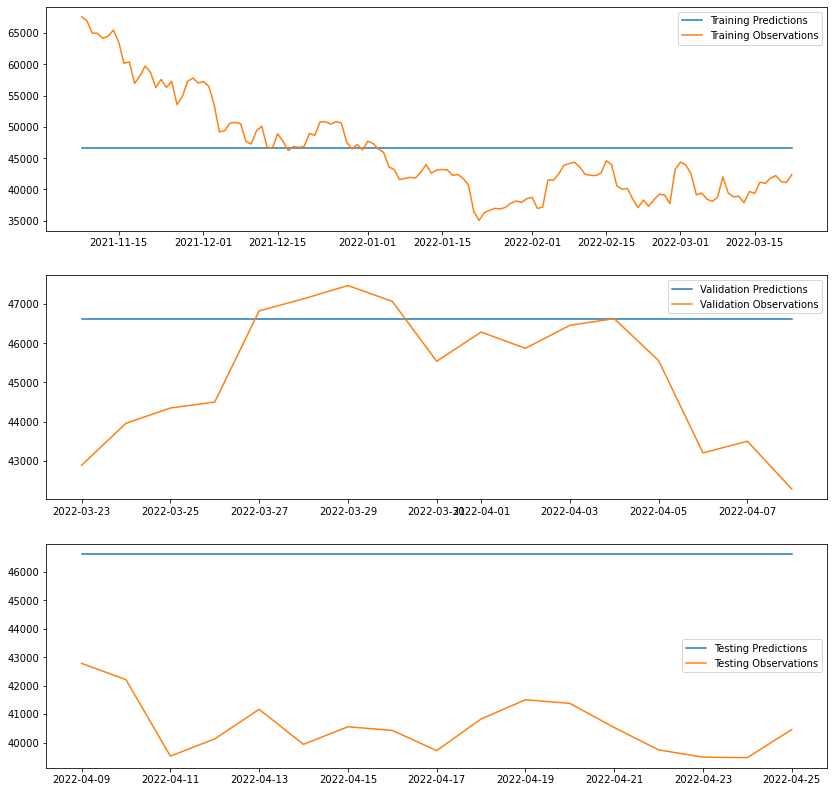

In [21]:
#PREDICT THE VALUES USING THE MODEL
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()


fig,axs = plt.subplots(3, 1, figsize=(14,14))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].legend(['Training Predictions', 'Training Observations'])

axs[1].plot(dates_val, val_predictions)
axs[1].plot(dates_val, y_val)
axs[1].legend(['Validation Predictions', 'Validation Observations'])

axs[2].plot(dates_test, test_predictions)
axs[2].plot(dates_test, y_test)
axs[2].legend(['Testing Predictions', 'Testing Observations'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_modelPredictions'+'.png')

## Recursive Predictions

In [22]:
from copy import deepcopy

#Get prediction for future dates recursively based on the previous existing information. Then update the window of days upon
#which the predictions are made

recursive_predictions = []
recursive_dates = np.concatenate([dates_test])

last_window = deepcopy(X_train[-1])

for target_date in recursive_dates:
    next_prediction = model.predict(np.array([last_window])).flatten()
    recursive_predictions.append(next_prediction)
    last_window = np.insert(last_window,0,next_prediction)[:-1]
    

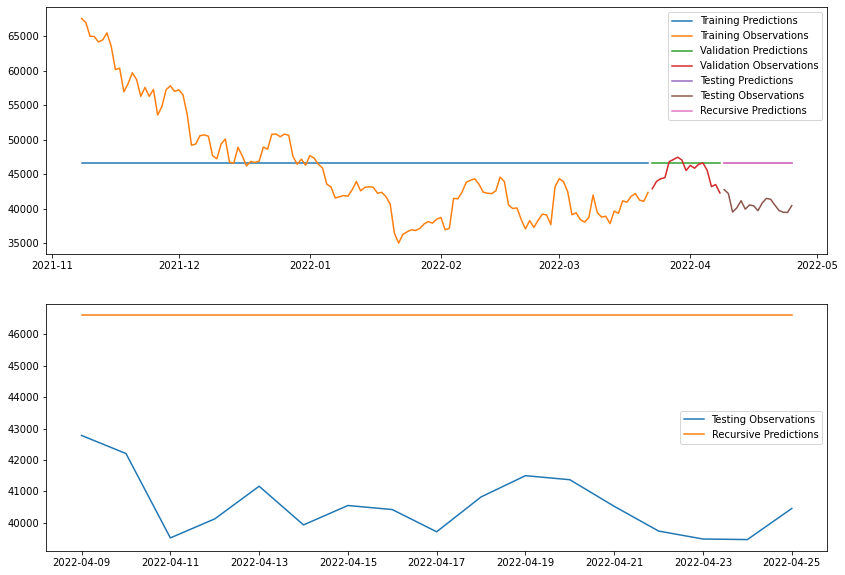

In [23]:
fig,axs = plt.subplots(2, 1, figsize=(14,10))

axs[0].plot(dates_train, train_predictions)
axs[0].plot(dates_train, y_train)
axs[0].plot(dates_val, val_predictions)
axs[0].plot(dates_val, y_val)
axs[0].plot(dates_test, test_predictions)
axs[0].plot(dates_test, y_test)
axs[0].plot(recursive_dates, recursive_predictions)
axs[0].legend(['Training Predictions', 
            'Training Observations',
            'Validation Predictions', 
            'Validation Observations',
            'Testing Predictions', 
            'Testing Observations',
            'Recursive Predictions'])

axs[1].plot(dates_test, y_test)
axs[1].plot(recursive_dates, recursive_predictions)
axs[1].legend(['Testing Observations',
              'Recursive Predictions'])

plt.savefig('../analysis/LTSM_recursive/'+coin_name +'_recursivePredictions'+'.png')

In [24]:
# coco